### Multivariate GARCH model:

* Model is given by equations (13.36) and (13.43) from http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/sfehtmlnode68.html#bekkmodel

* $Y_t \sim N(0, H_t)$, $H_t = C_0 C_0^\top + \sum_{i=1}^p A_i^\top Y_{t-i} Y_{t-i}^\top A_i + \sum_{j=1}^q B_j H_{t-j} B_j^\top$, $C_0$ is a lower-triangular matrix.

In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, numpy.random as npr, pystan as ps, pickle, pandas
from pylab import plot, show, legend
from time import time
from scipy.stats import *
from tqdm import trange

In [2]:
sm = ps.StanModel(file="multivariate_GARCH.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_79078453d2004721aa9cb2af03316bd7 NOW.


#### Load data from file and define dimensions etc:

In [3]:
T = 100
dim = 2
Y = npr.randn(T,dim)

### Plot data to visualize them:

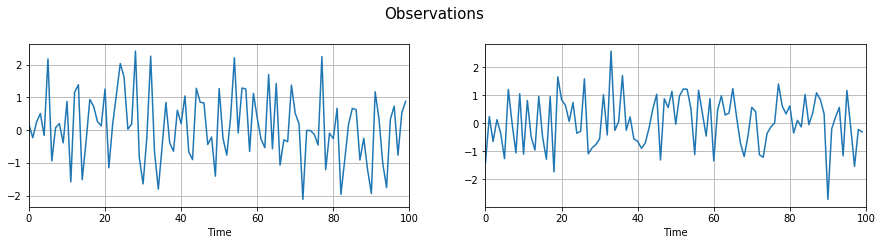

In [4]:
plt.rcParams['figure.figsize'] = (15, 3)
for d in range(dim) :
    plt.subplot(1,dim,d+1)
    plt.plot(Y[:,d])
    plt.grid(True)
    plt.xlabel("Time")
    plt.xlim(0,T)
plt.suptitle("Observations", y=1.05, fontsize=15);

In [9]:
p = 2
q = 2

In [10]:
n_chains = 2
n_iter = 200

data_pow1 = dict(T=T, dim=dim, p=p, q=q, Y=Y, power=1)
start = time()
fit_pow1 = sm.sampling(data=data_pow1, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=n_iter)
print(round((time()-start)/60,2), "minutes to run")
trace_pow1 = fit_pow1.extract()

data_pow5 = dict(T=T, dim=dim, p=p, q=q, Y=Y, power=5)
start = time()
fit_pow5 = sm.sampling(data=data_pow5, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=n_iter)
print(round((time()-start)/60,2), "minutes to run")
trace_pow5 = fit_pow5.extract()

n_mcmc = np.shape(trace_pow1['A'])[0]

0.2 minutes to run


RuntimeError: Initialization failed.

### Look at posterior samples:

In [9]:
AtA_pow1 = np.zeros((n_mcmc,dim,dim))
AtA_pow5 = np.zeros((n_mcmc,dim,dim))
BtB_pow1 = np.zeros((n_mcmc,dim,dim))
BtB_pow5 = np.zeros((n_mcmc,dim,dim))
CCt_pow1 = np.zeros((n_mcmc,dim,dim))
CCt_pow5 = np.zeros((n_mcmc,dim,dim))

for n in trange(n_mcmc) :
    AtA_pow1[n] = trace_pow1['A'][n,0].transpose().dot(trace_pow1['A'][n,0])
    AtA_pow5[n] = trace_pow5['A'][n,0].transpose().dot(trace_pow5['A'][n,0])
    BtB_pow1[n] = trace_pow1['B'][n,0].transpose().dot(trace_pow1['B'][n,0])
    BtB_pow5[n] = trace_pow5['B'][n,0].transpose().dot(trace_pow5['B'][n,0])
    CCt_pow1[n] = trace_pow1['C0'][n].dot(trace_pow1['C0'][n].transpose())
    CCt_pow5[n] = trace_pow5['C0'][n].dot(trace_pow5['C0'][n].transpose())

100%|██████████| 200/200 [00:00<00:00, 36593.13it/s]


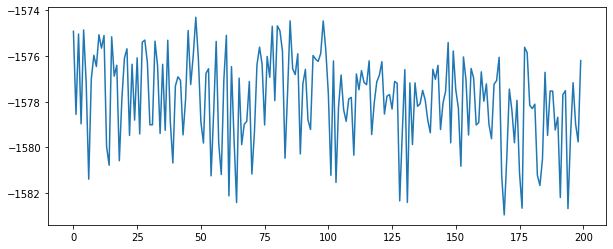

In [16]:
plt.plot(trace_pow5['lp__'])

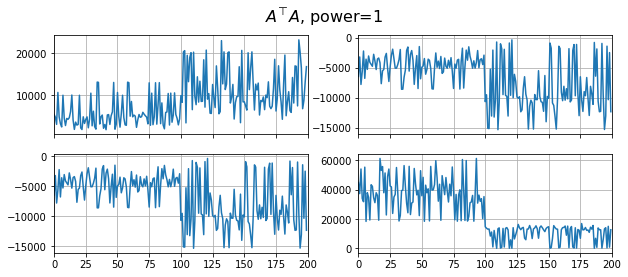

In [10]:
plt.rcParams['figure.figsize'] = (10, 4)
for i in range(dim) :
    for j in range(dim) :
        idx = dim*i+j+1
        plt.subplot(dim,dim,idx)
        plt.plot(AtA_pow1[:,i,j])
        plt.grid(True)
        plt.xlim(0,n_mcmc)
        if i < dim-1 : plt.xticks(alpha=0)
plt.suptitle(r"$A^\top A$, power=1", fontsize=16);

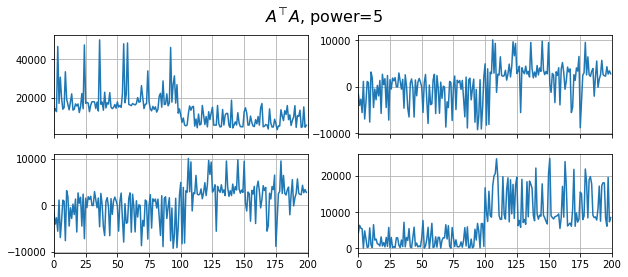

In [11]:
plt.rcParams['figure.figsize'] = (10, 4)
for i in range(dim) :
    for j in range(dim) :
        idx = dim*i+j+1
        plt.subplot(dim,dim,idx)
        plt.plot(AtA_pow5[:,i,j])
        plt.grid(True)
        plt.xlim(0,n_mcmc)
        if i < dim-1 : plt.xticks(alpha=0)
plt.suptitle(r"$A^\top A$, power=5", fontsize=16);

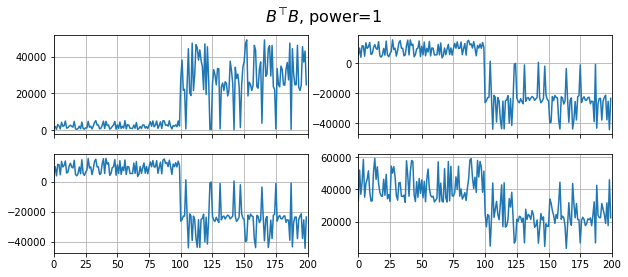

In [12]:
plt.rcParams['figure.figsize'] = (10, 4)
for i in range(dim) :
    for j in range(dim) :
        idx = dim*i+j+1
        plt.subplot(dim,dim,idx)
        plt.plot(BtB_pow1[:,i,j])
        plt.grid(True)
        plt.xlim(0,n_mcmc)
        if i < dim-1 : plt.xticks(alpha=0)
plt.suptitle(r"$B^\top B$, power=1", fontsize=16);

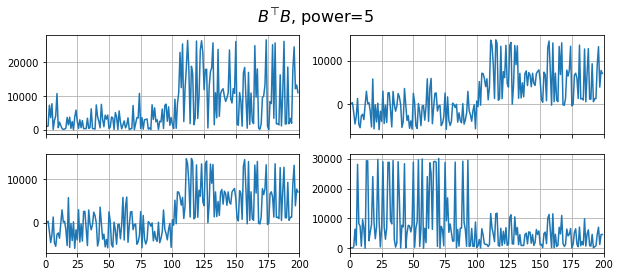

In [13]:
plt.rcParams['figure.figsize'] = (10, 4)
for i in range(dim) :
    for j in range(dim) :
        idx = dim*i+j+1
        plt.subplot(dim,dim,idx)
        plt.plot(BtB_pow5[:,i,j])
        plt.grid(True)
        plt.xlim(0,n_mcmc)
        if i < dim-1 : plt.xticks(alpha=0)
plt.suptitle(r"$B^\top B$, power=5", fontsize=16);

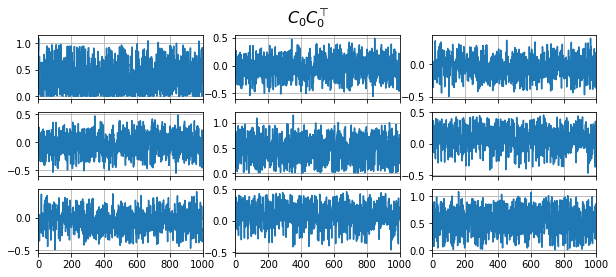

In [22]:
plt.rcParams['figure.figsize'] = (10, 4)
for i in range(dim) :
    for j in range(dim) :
        idx = dim*i+j+1
        plt.subplot(dim,dim,idx)
        plt.plot(CCt_pow1[:,i,j])
        plt.grid(True)
        plt.xlim(0,n_mcmc)
        if i < dim-1 : plt.xticks(alpha=0)
plt.suptitle(r"$C_0 C_0^\top$", fontsize=16);

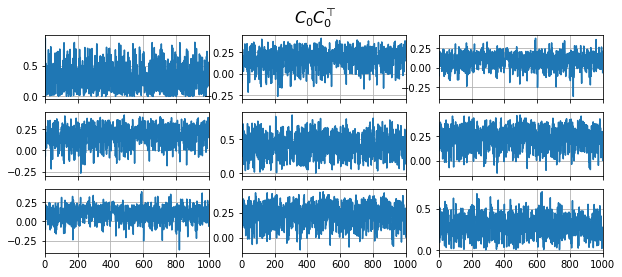

In [23]:
plt.rcParams['figure.figsize'] = (10, 4)
for i in range(dim) :
    for j in range(dim) :
        idx = dim*i+j+1
        plt.subplot(dim,dim,idx)
        plt.plot(CCt_pow5[:,i,j])
        plt.grid(True)
        plt.xlim(0,n_mcmc)
        if i < dim-1 : plt.xticks(alpha=0)
plt.suptitle(r"$C_0 C_0^\top$", fontsize=16);

In [25]:
print(np.mean(np.var(BtB_pow1,0)/np.var(BtB_pow5,0)))
print(np.mean(np.var(AtA_pow1,0)/np.var(AtA_pow5,0)))
print(np.mean(np.var(CCt_pow1,0)/np.var(CCt_pow5,0)))

2.3651246766905616
5.489182865537143
2.5375748408335905
